# Telling a Story - DonorChoose.org

![DonorChooseLogo](images/DonorsChoose_org_logo.jpg)

DonorChoose.org is a nonprofit dedicated to providing the funds that teachers need in order to improve the overall quaility of education.

## The problem

DonorChoose.org wants to find a method that 'will enable DonorsChoose.org to build targeted email campaigns recommending specific classroom requests to prior donors'.

The three target metrics for the solution are:
* Performance - Good Targeting
* Adaptable - Feasable Implementation
* Intelligible - Easily Understandable


## The first steps

The best way to begin is to use the data to give a brief overview of the company and the problem we wish to solve using the data we have been provided. Perhaps the most important metrics for any large company is the bottom line, so this kernel begins with examining income and a sucessful solutions possible impact on income. 

In [2]:
# Loading in packages

library(data.table)
library(ggplot2)
library(scales)
library(repr)
options(repr.plot.width=10, repr.plot.height=3)

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'scales' was built under R version 3.4.4"

In [3]:
# Loading in data

Donations <- fread('data/Donations.csv')
Donors <- fread('data/Donors.csv')
Projects <- fread('data/Projects.csv')
Resources <- fread('data/Resources.csv')
Schools <- fread('data/Schools.csv')
Teachers <- fread('data/Teachers.csv')

Read 4687884 rows and 7 (of 7) columns from 0.569 GB file in 00:00:29


Warning message in fread("data/Donors.csv"):
"Bumped column 5 to type character on data row 28151, field contains 'N2J'. Coercing previously read values in this column from logical, integer or numeric back to character which may not be lossless; e.g., if '00' and '000' occurred before they will now be just '0', and there may be inconsistencies with treatment of ',,' and ',NA,' too (if they occurred in this column before the bump). If this matters please rerun and set 'colClasses' to 'character' for this column. Please note that column type detection uses a sample of 1,000 rows (100 rows at 10 points) so hopefully this message should be very rare. If reporting to datatable-help, please rerun and include the output from verbose=TRUE."

Read 1208651 rows and 15 (of 15) columns from 2.237 GB file in 00:00:54
Read 7210448 rows and 5 (of 5) columns from 0.763 GB file in 00:00:16


In [5]:
# Adjusting the Donations data for graphing

Donations[, `Donation Received Date` := anytime::anydate(`Donation Received Date`)]
Donations[, Year := format(`Donation Received Date`, '%Y')]
Donation_by_day <- Donations[,.(Total_Donations = sum(`Donation Amount`)), by = `Donation Received Date`]
Donation_by_day[, Year := format(`Donation Received Date`, '%Y')]

### Revenue Year by Year
There is a strong upward trend on annual revenue. This is great news for DonorsChoose.org!

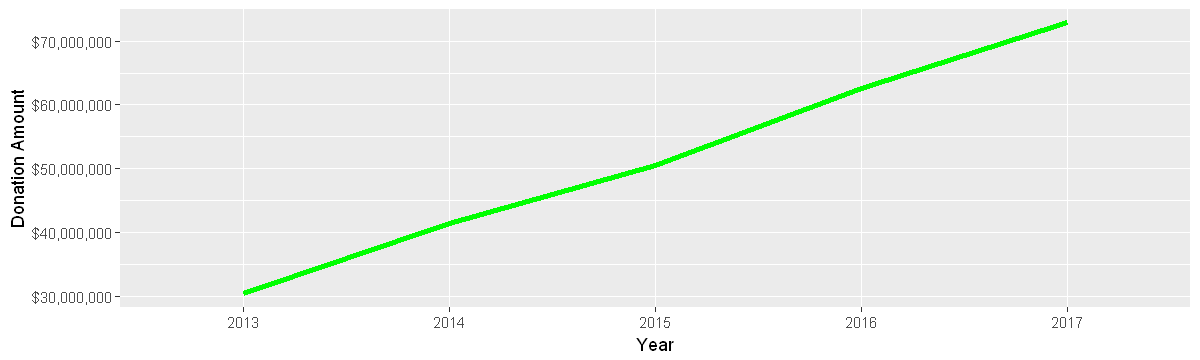

In [8]:
ggplot(Donations[Year!=2018 & Year!=2012,.(`Donation Amount` = sum( `Donation Amount`)), by =Year], aes(Year, `Donation Amount`)) +
    geom_line(aes(group = 1), color = 'green', size = 1.5) +
    scale_y_continuous(labels=dollar_format())

### Revenue over the Year

We can see that the later half of the year has 